https://stepik.org/lesson/1370095/step/7

# Решение

У нас логарифмическая функции потерь
$$
\text{loss}(w, x, y) = \log_2(1 + e^{-M})
$$

где $ M = w ⋅ x ⋅ y $ (здесь скобки означают, что произведение - скаляроное)

Производная функции потерь по $M$:

$$
\frac{\partial \text{loss}}{\partial M} = -\frac{1}{\ln(2)} \cdot \frac{e^{-M}}{1 + e^{-M}}
$$

Так как $M = (w \cdot x) \cdot y$, , то, по правилу цепочки, производная по $w$ будет:

$$
\frac{\partial \text{loss}}{\partial w} = \frac{\partial \text{loss}}{\partial M} \cdot \frac{\partial M}{\partial w}
$$

$$
\frac{\partial \text{loss}}{\partial w} = -\frac{1}{\ln(2)} \cdot \frac{e^{-M}}{1 + e^{-M}} \cdot xy
$$

Итоговая формула, по которой написана функция:

$$
\frac{\partial \text{loss}}{\partial w} = -\frac{xye^{-M}}{\ln(2)(1 + e^{-M})}
$$

w = [-8.9048e+00  5.2000e-03  2.7772e+00  1.7000e-03  1.0852e+00]
Q =  0.06


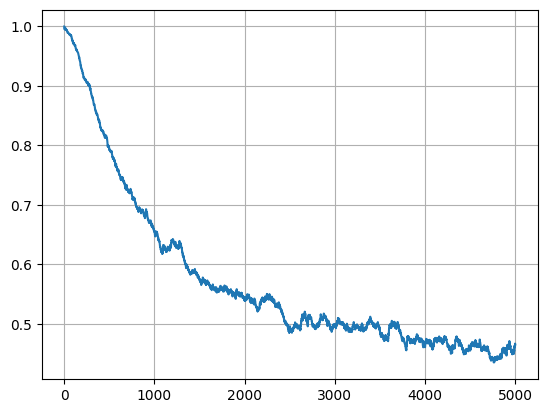

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))

# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

# Данные
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1], 0.8*x[0], (x[0]+x[1])/2] for x in data_x])
y_train = np.array(data_y)

# Параметры
n_train = len(x_train)          # размер обучающей выборки
w = np.zeros(len(x_train[0]))   # начальные нулевые весовые коэффициенты
nt = np.array([0.5] + [0.01] * (len(w) - 1))  # шаг обучения для каждого параметра w0, w1, w2, ...
lm = 0.01           # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 5000             # число итераций алгоритма SGD
batch_size = 10     # размер мини-батча (величина K = 10)
lm_l1 = 0.05        # параметр лямбда для L1-регуляризатора
np.random.seed(0)   # генерация одинаковых последовательностей псевдослучайных чисел

Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)]) # начальное значение среднего эмпирического риска
Q_plot = [Qe]

for i in range(N):
    k = np.random.randint(0, n_train-batch_size-1) # n_train - размер выборки (массива x_train)
    X_batch = x_train[k:k + batch_size]
    y_batch = y_train[k:k + batch_size]
    ek = np.array([loss(w, x, y) for x, y in zip(X_batch, y_batch)]).mean(axis=0) # вычисление потерь для выбранного вектора
    grad = np.array([df(w, x, y) for x, y in zip(X_batch, y_batch)]).mean(axis=0) # вычисление градиента потерь для выбранного вектора

    # вариант не регулирем w[0]:
    regularization = lm_l1 * np.sign(w[1:])  # Применяем только к w[1], w[2], ...
    w -= nt * (grad + np.concatenate(([0], regularization)))  # корректировка весов, не изменяем w[0]

    # # вариант регулирем w[0]:
    # w -= nt * (grad + lm_l1 * np.sign(w))

    Qe = lm * ek + (1 - lm) * Qe                # пересчет показателя качества
    Q_plot.append(Qe)

Q = np.mean([(np.dot(w, x) * y < 0) for x, y in zip(x_train, y_train)]) # истинное значение эмпирического риска после обучения
print('w =', w.round(4))
print('Q = ', Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()

In [ ]:
# Vadim Kopeykin https://stepik.org/lesson/1370095/step/7?discussion=10529214&thread=solutions&unit=1386285
import numpy as np

def loss(w, X, y): # логарифмическая функция потерь
    M = X @ w * y
    return np.log2(1 + np.exp(-M)).mean()

def df(w, X, y): # производная логарифмической функции потерь по вектору w
    M = X @ w * y
    return -(np.exp(-M) * y) / ((1 + np.exp(-M)) * np.log(2) * len(X)) @ X

X = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]

y = np.array([-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1])

X = np.array([[1, x[0], x[1], 0.8 * x[0], (x[0] + x[1]) / 2] for x in X]) # матрица пизнаков
w = np.zeros(X.shape[1]) # начальные нулевые весовые коэффициенты
nt = np.array([0.5] + [0.01] * (len(w) - 1)) # шаг обучения для каждого параметра w0, w1, w2, ...
lm = 0.01 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500                        # число итераций алгоритма SGD
batch_size = 10                # размер мини-батча (величина K = 10)
lm_l1 = np.ones_like(w) * 0.05 # параметр лямбда для L1-регуляризатора
lm_l1[0] = 0                   # параметр w0 не регуляриpуем

Qe = loss(w, X, y) # начальное значение среднего эмпирического риска
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(len(X) - batch_size - 1) # сгенеировать индекс начала батча
    batch = np.arange(k, k + batch_size)           # индексы батча

    Qe += lm * (loss(w, X[batch], y[batch]) - Qe)  # обновить экспоненциальное среднее Qe
    w -= nt * (df(w, X[batch], y[batch]) + lm_l1 * np.sign(w)) # обновить параметры модели

Q = (X @ w * y < 0).mean()  # вычислить итоговое значение среднего эмпирического риска

print('w =', w.round(4))
print('Q = ', Q)

w = [-3.6701  0.1226  0.6686  0.0504  0.3951]
Q =  0.09


In [ ]:
# @title Матрица признаков - быстрый способ
import numpy as np


# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))

# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

# Данные
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1], 0.8*x[0], (x[0]+x[1])/2] for x in data_x]) # матрица признаков
y_train = np.array(data_y)

# Параметры
n_train = len(x_train)          # размер обучающей выборки
w = np.zeros(len(x_train[0]))   # начальные нулевые весовые коэффициенты
nt = np.array([0.5] + [0.01] * (len(w) - 1))  # шаг обучения для каждого параметра w0, w1, w2, ...
lm = 0.01           # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500             # число итераций алгоритма SGD
batch_size = 10     # размер мини-батча (величина K = 10)
lm_l1 = 0.05        # параметр лямбда для L1-регуляризатора
np.random.seed(0)   # генерация одинаковых последовательностей псевдослучайных чисел

# Вектор для lm_l1
lm_l1_vector = np.ones_like(w) * lm_l1
lm_l1_vector[0] = 0 # первый коэффициент не регуляризуем

Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)]) # начальное качество

# спуск с L1-регуляризацией
for _ in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)
    Xb = x_train[k:k + batch_size]
    Yb = y_train[k:k + batch_size]
    ek = np.array([loss(w, x, y) for x, y in zip(Xb, Yb)]).mean(axis=0) # вычисление потерь для батча
    grad = np.array([df(w, x, y) for x, y in zip(Xb, Yb)]).mean(axis=0) # вычисление градиента потерь для батча
    Qe = lm * ek + (1 - lm) * Qe       # пересчет показателя качества
    w -= nt * (grad + lm_l1_vector * np.sign(w)) # обновить параметры модели

print('w =', w.round(4))
print('Q = ', Q)

w = [-3.6701  0.1226  0.6686  0.0504  0.3951]
Q =  0.09
